# Example code for OSL Learning
We will use the

In [1]:
import torch

import matplotlib.pyplot as plt

from datasets.openml_datasets import OpenML_Dataset
from datasets.torch_datasets import Torch_Dataset
from utils.weakener import Weakener
from models.model import MLP
from utils.losses import PartialLoss,CELoss,BrierLoss,LBLoss,EMLoss,OSLCELoss,OSLBrierLoss
from utils.trainig_testing import train_model,evaluate_model,train_and_evaluate

The steps you might want to take for running the full 'weakening - learning - evaluating' experience
<ol>
<li> Loading the clean dataset: <code>Data = OpemML_Dataset('name')</code></li>
<li> Setting the Weakener class: <code>Weak = Weakener(Data.num_classes)</code></li>
<ol>
<li> Generate the mixing matrix: <code>WL.generate_M(model_class='pll')</code></li>
<li> Generate the weak labels <em>(z=index,w=one_hot)</em>: <code>z, w = WL.generate_weak(train_y)</code></li>
<ul style="list-style: none;">
 <li>Generating virtual label matrix or virtual labels is not necessary when training an OSL Learning algorithm as it only uses the weak labels</li>
</ul>
</ol>
<li>Generate the dataloaders (trainloader/testloader) for the dataset enhaced with the weak labels</li>
<ol>
<li> Include weak labels into the dataset: <code>Data.include_weak(Weak.w)</code></li>
<li> Generate the dataloaders: <code>trainloader, testloader = Data.get_dataloader()</code></li>
</ol>
<li> We create the mlp: <code>mlp = MLP(Data.num_features,[Data.num_features],Data.num_classes,dropout_p=0.5)</code></li>
</ol>

Fasten your seatbelt!

In [2]:
#Data = OpenML_Dataset('iris')
Data = Torch_Dataset('kmnist')
train_x, train_y, test_x, test_y = Data.get_data()
# WL stores processes relative to the Weakening process
Weak = Weakener(Data.num_classes)
Weak.generate_M(model_class='pll')

Extracting ./data\KMNIST\raw\train-images-idx3-ubyte.gz to ./data\KMNIST\raw

Extracting ./data\KMNIST\raw\train-labels-idx1-ubyte.gz to ./data\KMNIST\raw

Extracting ./data\KMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\KMNIST\raw

Extracting ./data\KMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\KMNIST\raw



100.0%
100.0%
100.0%
100.0%


In [3]:
z, w = Weak.generate_weak(train_y)

In [4]:
Data.include_weak(Weak.w)

In [5]:
trainloader, testloader = Data.get_dataloader()



In [6]:
mlp = MLP(Data.num_features,[Data.num_features],Data.num_classes,dropout_p=0.)
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)
loss_fn = OSLBrierLoss()

mlp,results = train_and_evaluate(mlp,trainloader,testloader,optimizer,loss_fn,num_epochs=10)

Epoch 1/10: Train Loss: 0.1322, Train Acc: 0.6754, Test Acc: 0.6749
Epoch 2/10: Train Loss: 0.0573, Train Acc: 0.8627, Test Acc: 0.7787
Epoch 3/10: Train Loss: 0.0378, Train Acc: 0.9067, Test Acc: 0.7955
Epoch 4/10: Train Loss: 0.0308, Train Acc: 0.9162, Test Acc: 0.8045
Epoch 5/10: Train Loss: 0.0257, Train Acc: 0.9270, Test Acc: 0.8170
Epoch 6/10: Train Loss: 0.0221, Train Acc: 0.9322, Test Acc: 0.8280
Epoch 7/10: Train Loss: 0.0197, Train Acc: 0.9358, Test Acc: 0.8333
Epoch 8/10: Train Loss: 0.0175, Train Acc: 0.9397, Test Acc: 0.8324
Epoch 9/10: Train Loss: 0.0158, Train Acc: 0.9415, Test Acc: 0.8428
Epoch 10/10: Train Loss: 0.0153, Train Acc: 0.9429, Test Acc: 0.8384


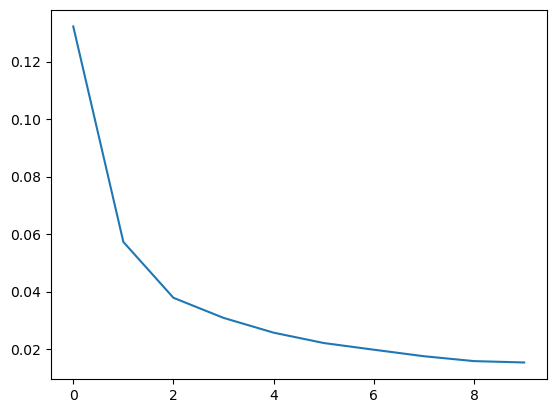

In [7]:
plt.plot(results['train_loss'])

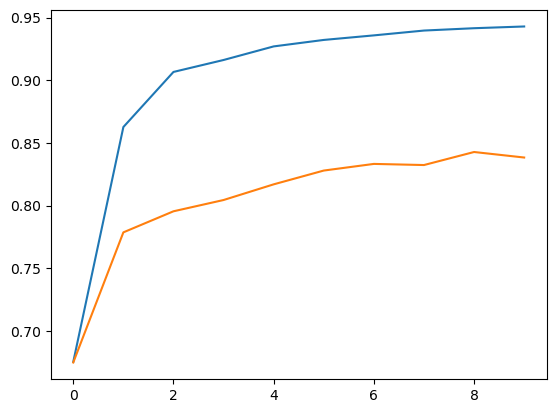

In [8]:
plt.plot(results['train_acc'])
plt.plot(results['test_acc'])

In [9]:
results

{'train_loss': [0.13224467548529306,
  0.057251057521502176,
  0.03780477564036846,
  0.03081488476296266,
  0.025669079627158743,
  0.022071643599122764,
  0.019740446915555123,
  0.01747072384835143,
  0.015772191583784297,
  0.015298347660773046],
 'train_acc': [tensor(0.6754, dtype=torch.float64),
  tensor(0.8627, dtype=torch.float64),
  tensor(0.9067, dtype=torch.float64),
  tensor(0.9162, dtype=torch.float64),
  tensor(0.9270, dtype=torch.float64),
  tensor(0.9322, dtype=torch.float64),
  tensor(0.9358, dtype=torch.float64),
  tensor(0.9397, dtype=torch.float64),
  tensor(0.9415, dtype=torch.float64),
  tensor(0.9429, dtype=torch.float64)],
 'test_acc': [tensor(0.6749, dtype=torch.float64),
  tensor(0.7787, dtype=torch.float64),
  tensor(0.7955, dtype=torch.float64),
  tensor(0.8045, dtype=torch.float64),
  tensor(0.8170, dtype=torch.float64),
  tensor(0.8280, dtype=torch.float64),
  tensor(0.8333, dtype=torch.float64),
  tensor(0.8324, dtype=torch.float64),
  tensor(0.8428, dtyp